In [1]:
# EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#useful imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Breast_Cancer.csv', delimiter=',')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
from sklearn.model_selection import train_test_split


features = df.drop("Status",axis=1)
target = df.loc[:, "Status"]

features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.1,random_state=3)

In [4]:
def relabeling(features, target):
    features['T Stage '].replace({'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4}, inplace=True)
    features['N Stage'].replace({'N1': 1, 'N2': 2, 'N3': 3}, inplace=True)
    features['6th Stage'].replace({'IIA': 1, 'IIB': 2, 'IIIA': 3, 'IIIB': 4, 'IIIC': 5}, inplace=True)
    features['differentiate'].replace({'Undifferentiated': 1, 'Poorly differentiated': 2, 'Moderately differentiated': 3, 'Well differentiated': 4}, inplace=True)
    features['Grade'].replace({'1': 1, '2': 2,'3': 3, ' anaplastic; Grade IV': 4}, inplace=True)
    #features['A Stage'].replace({'Regional': 1, 'Distant': 2}, inplace=True)
    #features['Estrogen Status'].replace({'Positive': 1, 'Negative': 0}, inplace=True)
    #features['Progesterone Status'].replace({'Positive': 1, 'Negative': 0}, inplace=True)
    target.replace({'Alive': 0, 'Dead': 1}, inplace=True)
    return features, target

In [5]:
def feature_engineering(features, cols_cat_nom, cols_num):
    df = features.copy()
    df.loc[:, "Age_group"] = pd.cut(x=features.loc[:, 'Age'], bins=[30,34,39,44,49,54,59,64,69],
                        labels = ['30-34','35-39','40-44','45-49','50-54','55-59',
                                 '60-64','65-69'])
    df = df.drop('Age', axis=1)
    cols_cat_nom.append("Age_group")
    cols_num.remove('Age')
    return df, cols_cat_nom, cols_num

In [5]:
cols_cat = [col for col in df.select_dtypes("object")]
cols_num = [col for col in df.select_dtypes(include=["int64","float64"])]
cols_cat_nom = ['Race', 'Marital Status', '6th Stage', 'differentiate', 'A Stage', 'Estrogen Status', 'Progesterone Status']
cols_cat_ord = ['T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade']

In [6]:
features_train["Age_group"] = pd.cut(x=features_train.loc[:, 'Age'], bins=[30,34,39,44,49,54,59,64,69],
                        labels = ['30-34','35-39','40-44','45-49','50-54','55-59',
                                 '60-64','65-69'])
features_train = features_train.drop('Age', axis=1)
cols_cat_nom.append("Age_group")
cols_num.remove('Age')

In [7]:
display(cols_cat_nom)
display(cols_num)
display(features_train.head())
display(features_test.head())

['Race',
 'Marital Status',
 '6th Stage',
 'differentiate',
 'A Stage',
 'Estrogen Status',
 'Progesterone Status',
 'Age_group']

['Tumor Size',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months']

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Age_group
3436,White,Married,T2,N1,IIB,Well differentiated,1,Regional,27,Positive,Positive,16,1,97,55-59
1721,White,Married,T2,N3,IIIC,Moderately differentiated,2,Regional,30,Positive,Positive,18,2,64,50-54
2995,Other,Married,T3,N3,IIIC,Moderately differentiated,2,Regional,55,Positive,Positive,32,19,102,60-64
330,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,35,Positive,Positive,24,1,100,45-49
1142,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,37,Positive,Positive,17,9,61,45-49


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
3027,52,White,Single,T1,N1,IIA,Poorly differentiated,3,Regional,11,Positive,Positive,1,1,89
1740,69,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,1,1,80
2878,54,White,Single,T2,N3,IIIC,Poorly differentiated,3,Regional,25,Negative,Negative,13,13,63
879,40,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Negative,16,1,85
658,51,White,Married,T2,N3,IIIC,Poorly differentiated,3,Regional,32,Positive,Positive,11,10,76


In [8]:
from sklearn.pipeline import Pipeline


pipeline_rf = Pipeline([('preprocessing', ColumnTransformer([
                    ('encoder', OneHotEncoder(sparse=False,handle_unknown='ignore'), cols_cat_nom)], remainder='passthrough')),
                    ('scaler', StandardScaler()),
                    ('classifier', RandomForestClassifier(class_weight="balanced", random_state=0))])

In [9]:
features_train_rel, target_train_rel = relabeling(features_train, target_train)

In [10]:
pipeline_rf.fit(features_train_rel, target_train_rel)

c:\Users\flori\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Race', 'Marital Status',
                                                   '6th Stage', 'differentiate',
                                                   'A Stage', 'Estrogen Status',
                                                   'Progesterone Status',
                                                   'Age_group'])])),
                ('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=0))])

In [11]:
features_test["Age_group"] = pd.cut(x=features_test.loc[:, 'Age'], bins=[30,34,39,44,49,54,59,64,69],
                        labels = ['30-34','35-39','40-44','45-49','50-54','55-59',
                                 '60-64','65-69'])
features_test = features_test.drop('Age', axis=1)

features_test_rel, target_test_rel = relabeling(features_test, target_test)
target_test_pred_rf = pipeline_rf.predict(features_test_rel)

In [12]:
model_results = []

scores = {'name': "RandomForestClassifier",
          'accuracy': accuracy_score(target_test_rel,target_test_pred_rf) * 100,
          'precision': precision_score(target_test_rel,target_test_pred_rf) * 100,
          'recall': recall_score(target_test_rel,target_test_pred_rf) * 100,
          'F1': f1_score(target_test_rel,target_test_pred_rf) * 100,
             }
model_results.append(scores)
pd.DataFrame(model_results).T


,0
name,RandomForestClassifier
accuracy,89.330025
precision,83.333333
recall,39.68254
F1,53.763441


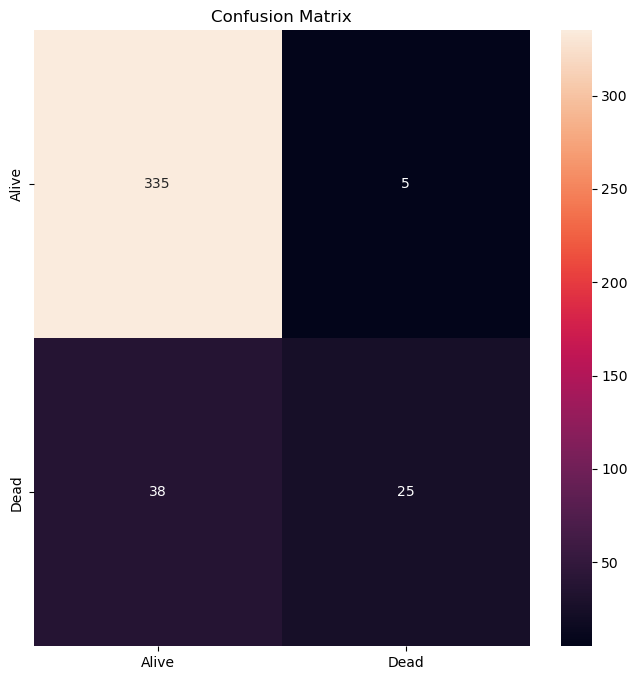

In [13]:
labels = ['Alive', 'Dead']
cm = confusion_matrix(target_test_rel, target_test_pred_rf)
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt='', xticklabels = labels, yticklabels = labels)
plt.title('Confusion Matrix')
plt.show()

In [14]:
# report
report = classification_report(target_test_rel, target_test_pred_rf)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       340
           1       0.83      0.40      0.54        63

    accuracy                           0.89       403
   macro avg       0.87      0.69      0.74       403
weighted avg       0.89      0.89      0.88       403



In [15]:
# Run GridSearch with RandomForest

# initiate model


# Create the parameter grid
grid_search_rf = [{'max_depth':[10,11,12,13,14,15,"none"],       
                    'max_features':[2, 3, 4, 5, 6, 8, 20,"auto"],
                    'min_samples_split':[2, 3, 4],
                    'min_samples_leaf':[2, 3, 4]
                    }]

# Create an instance of GridSearch 
grid_rf = GridSearchCV(estimator=pipeline_rf,
                     param_grid = grid_search_rf,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)

# Train the RandomForestClassifier
grid_rf.fit(features_train_rel, target_train_rel)

# Print the training score of the best model
print("best score")
print(grid_rf.best_score_)

# Print the model parameters of the best model
print("best model parameter")
print(grid_rf.best_params_)

# Print the val score of the best model
#predict
target_test_pred_rf_grid = grid_rf.best_estimator_.predict(features_test_rel)

#save
scores = {'name': "RandomForest_GridSearch",
          'accuracy': accuracy_score(target_test_rel, target_test_pred_rf_grid) * 100,
          'precision': precision_score(target_test_rel, target_test_pred_rf_grid) * 100,
          'recall': recall_score(target_test_rel, target_test_pred_rf_grid) * 100,
          'F1': f1_score(target_test_rel, target_test_pred_rf_grid) * 100,
             }
model_results.append(scores)
    
#show results
pd.DataFrame(model_results)

ValueError: Invalid parameter 'max_depth' for estimator Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Race', 'Marital Status',
                                                   '6th Stage', 'differentiate',
                                                   'A Stage', 'Estrogen Status',
                                                   'Progesterone Status',
                                                   'Age_group'])])),
                ('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=0))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [16]:
# Logistic Regression

# create Pipeline
pipeline_log = Pipeline([('preprocessing', ColumnTransformer([
                    ('encoder', OneHotEncoder(sparse=False,handle_unknown='ignore'), cols_cat_nom)], remainder='passthrough')),
                    ('scaler', StandardScaler()),
                    ('classifier', LogisticRegression(max_iter=1000))])

# fit pipeline on cleaned training set
pipeline_log.fit(features_train_rel, target_train_rel)

# predict and evaluate on test set

#predict
target_test_pred_log = pipeline_log.predict(features_test_rel)

#save
scores = {'name': "LogisticRegression",
          'accuracy': accuracy_score(target_test_rel, target_test_pred_log) * 100,
          'precision': precision_score(target_test_rel, target_test_pred_log) * 100,
          'recall': recall_score(target_test_rel, target_test_pred_log) * 100,
          'F1': f1_score(target_test_rel, target_test_pred_log) * 100,
             }
model_results.append(scores)
    
#show results
pd.DataFrame(model_results).T

c:\Users\flori\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1
name,RandomForestClassifier,LogisticRegression
accuracy,89.330025,90.074442
precision,83.333333,81.081081
recall,39.68254,47.619048
F1,53.763441,60.0


In [17]:
# report
report = classification_report(target_test_rel, target_test_pred_log)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       340
           1       0.81      0.48      0.60        63

    accuracy                           0.90       403
   macro avg       0.86      0.73      0.77       403
weighted avg       0.89      0.90      0.89       403



In [18]:
# Run GridSearch with LogisticRegression

# creat C_values
import numpy as np 
C_values = np.geomspace(0.001,1000,10)

# creat parameter Grid
grid_search_log = [{'model_log__penalty':["l2","l1"],
                    'model_log__solver': ['liblinear', 'lbfgs'],
                    'model_log__C': C_values
                    }]

# Create an instance of GridSearch Cross-validation estimator
grid_log = GridSearchCV(estimator=pipeline_log,
                     param_grid = grid_search_log,
                     scoring='f1',
                     cv=3,   
                     n_jobs=-1)

# Train the RandomForestClassifier
grid_log.fit(features_train_rel, target_train_rel)

# Print the training score of the best model
print("best score")
print(grid_log.best_score_)

# Print the model parameters of the best model
print("best model parameter")
print(grid_log.best_params_)

# Print the test score of the best model
#predict
target_test_pred_log_grid = grid_log.best_estimator_.predict(features_test_rel)

#save
scores = {'name': "LogisticRegression_GridSearch",
          'accuracy': accuracy_score(target_test_rel, target_test_pred_log_grid) * 100,
          'precision': precision_score(target_test_rel, target_test_pred_log_grid) * 100,
          'recall': recall_score(target_test_rel, target_test_pred_log_grid) * 100,
          'F1': f1_score(target_test_rel, target_test_pred_log_grid) * 100,
             }
model_results.append(scores)
    
#show results
pd.DataFrame(model_results).T 

ValueError: Invalid parameter 'model_log' for estimator Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Race', 'Marital Status',
                                                   '6th Stage', 'differentiate',
                                                   'A Stage', 'Estrogen Status',
                                                   'Progesterone Status',
                                                   'Age_group'])])),
                ('scaler', StandardScaler()),
                ('classifier', LogisticRegression(max_iter=1000))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [19]:
#Support Vector Machine with Gaussian kernel
from sklearn.svm import SVC 

# create Pipeline
pipeline_svc = Pipeline([('preprocessing', ColumnTransformer([
                    ('encoder', OneHotEncoder(sparse=False,handle_unknown='ignore'), cols_cat_nom)], remainder='passthrough')),
                    ('scaler', StandardScaler()),
                    ('classifier', SVC(C=1000, kernel="rbf", gamma='scale', class_weight='balanced', random_state=42))])

#fit Model
pipeline_svc.fit(features_train_rel,target_train_rel)

#predict
target_test_pred_rfb = pipeline_svc.predict(features_test_rel)

#save
scores = {'name': "SVC with Gaussian kernel",
          'accuracy': accuracy_score(target_test_rel, target_test_pred_rfb) * 100,
          'precision': precision_score(target_test_rel, target_test_pred_rfb) * 100,
          'recall': recall_score(target_test_rel, target_test_pred_rfb) * 100,
          'F1': f1_score(target_test_rel, target_test_pred_rfb) * 100,
             }
model_results.append(scores)
    
#show results
pd.DataFrame(model_results).T

c:\Users\flori\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2
name,RandomForestClassifier,LogisticRegression,SVC with Gaussian kernel
accuracy,89.330025,90.074442,81.637717
precision,83.333333,81.081081,41.791045
recall,39.68254,47.619048,44.444444
F1,53.763441,60.0,43.076923


In [20]:
# report
report = classification_report(target_test_rel, target_test_pred_rfb)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       340
           1       0.42      0.44      0.43        63

    accuracy                           0.82       403
   macro avg       0.66      0.66      0.66       403
weighted avg       0.82      0.82      0.82       403



In [21]:
#Support Vector Machine with polynomial kernel
from sklearn.svm import SVC 

# create Pipeline
pipeline_svc = Pipeline([('preprocessing', ColumnTransformer([
                    ('encoder', OneHotEncoder(sparse=False,handle_unknown='ignore'), cols_cat_nom)], remainder='passthrough')),
                    ('scaler', StandardScaler()),
                    ('classifier', SVC(C=1000, kernel='poly', degree=2, gamma='scale', class_weight='balanced', random_state=42))])

#fit Model
pipeline_svc.fit(features_train_rel,target_train_rel)

#predict
target_test_pred_poly = pipeline_svc.predict(features_test_rel)

#save
scores = {'name': "SVC with polynomial kernel of degree 2",
          'accuracy': accuracy_score(target_test_rel, target_test_pred_poly) * 100,
          'precision': precision_score(target_test_rel, target_test_pred_poly) * 100,
          'recall': recall_score(target_test_rel, target_test_pred_poly) * 100,
          'F1': f1_score(target_test_rel, target_test_pred_poly) * 100,
             }
model_results.append(scores)
    
#show results
pd.DataFrame(model_results).T

c:\Users\flori\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3
name,RandomForestClassifier,LogisticRegression,SVC with Gaussian kernel,SVC with polynomial kernel of degree 2
accuracy,89.330025,90.074442,81.637717,81.637717
precision,83.333333,81.081081,41.791045,43.820225
recall,39.68254,47.619048,44.444444,61.904762
F1,53.763441,60.0,43.076923,51.315789


In [22]:
# report
report = classification_report(target_test_rel, target_test_pred_poly)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.89       340
           1       0.44      0.62      0.51        63

    accuracy                           0.82       403
   macro avg       0.68      0.74      0.70       403
weighted avg       0.85      0.82      0.83       403



In [23]:
# RandomForestClassifier with PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

#initate PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2,              # Te degree of the resulting polynomial
                                      interaction_only=False, # Controls whether self interactons are included 
                                      include_bias=False)    # Controls whether the 1 is also icluded as a feature

#initate model
model_forest = RandomForestClassifier(class_weight="balanced", random_state=0)

#create Pipeline
pipeline_rf_poly = Pipeline([('preprocessing', ColumnTransformer([
                    ('encoder', OneHotEncoder(sparse=False,handle_unknown='ignore'), cols_cat_nom)], remainder='passthrough')),
                    ('scaler', StandardScaler()),
                    ("poly", poly_transformer),
                    ('classifier', RandomForestClassifier(class_weight="balanced", random_state=0))])

# Train the RandomForestClassifier
pipeline_rf_poly.fit(features_train_rel, target_train_rel)


#predict
target_test_pred_rf_poly = pipeline_rf_poly.predict(features_test_rel)

#save
scores = {'name': "RandomForest_GridSearch_poly",
          'accuracy': accuracy_score(target_test_rel,target_test_pred_rf_poly),
          'precision': precision_score(target_test_rel,target_test_pred_rf_poly),
          'recall': recall_score(target_test_rel,target_test_pred_rf_poly),
          'F1': f1_score(target_test_rel,target_test_pred_rf_poly),
             }
model_results.append(scores)
    
#show results
pd.DataFrame(model_results).T

c:\Users\flori\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4
name,RandomForestClassifier,LogisticRegression,SVC with Gaussian kernel,SVC with polynomial kernel of degree 2,Rf_GridSearch_poly
accuracy,89.330025,90.074442,81.637717,81.637717,0.888337
precision,83.333333,81.081081,41.791045,43.820225,0.78125
recall,39.68254,47.619048,44.444444,61.904762,0.396825
F1,53.763441,60.0,43.076923,51.315789,0.526316


In [24]:
# report
report = classification_report(target_test_rel, target_test_pred_rf_poly)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       340
           1       0.78      0.40      0.53        63

    accuracy                           0.89       403
   macro avg       0.84      0.69      0.73       403
weighted avg       0.88      0.89      0.87       403

